In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import mpld3

records=pd.read_csv('../data/records.csv')
#champions=pd.read_csv('../data/champions.csv', parse_dates=['female_time'])

champions=pd.read_csv('../data/champions.csv')
champions=champions.reindex(index=champions.index[::-1]).reset_index(drop=True)

In [7]:
champions['male_time_str']=champions.male_time.copy()
champions['female_time_str']=champions.female_time.copy()

champions.male_time=pd.to_datetime(champions.male_time.copy())
champions.female_time=pd.to_datetime(champions.female_time.copy())

time = pd.DatetimeIndex(champions['female_time'])

In [8]:
print champions.female_time_str.dtype
print champions.female_time.dtype

object
datetime64[ns]


In [9]:
champions.to_html("champs.html")

In [10]:
%matplotlib inline
#female_seconds=[int(t.split(':')[0])*60+int(t.split(':')[1]) for t in champions.female_time]

def s2ms(x, i):
    m = int(x/60)
    s = int(x%60)
    return '%(m)02d:%(s)02d' % {'m':m,'s':s}


print female_seconds

champions['female_seconds'] = pd.Series(female_seconds, index=champions.index)

'''

fig=plt.figure(figsize=(10,8))

ax=plt.subplot(111)
plt.scatter(champions.year, female_seconds)'''
ax.yaxis.set_major_formatter(ff(s2ms))

plt.show()

NameError: name 'female_seconds' is not defined

In [5]:
print champions.female_seconds

AttributeError: 'DataFrame' object has no attribute 'female_seconds'

In [4]:
greyclass HelloWorld(mpld3.plugins.PluginBase):  # inherit from PluginBase
    """Hello World plugin"""
    
    JAVASCRIPT = """
    mpld3.register_plugin("helloworld", HelloWorld);
    HelloWorld.prototype = Object.create(mpld3.Plugin.prototype);
    HelloWorld.prototype.constructor = HelloWorld;
    function HelloWorld(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    
    HelloWorld.prototype.draw = function(){
        // FIXME: this is a very brittle way to select the y-axis element
        var ax = this.fig.axes[0].elements[1];

        // see https://github.com/mbostock/d3/wiki/Formatting#d3_format
        // for d3js formating documentation
        ax.axis.tickFormat(d3.format("d"));

        // TODO: use a function for tick values that
        // updates when values pan and zoom
        ax.axis.tickValues([1,100,1000]);

        // HACK: use reset to redraw figure
        this.fig.reset(); 
    }
    """
    def __init__(self):
        self.dict_ = {"type": "helloworld"}

In [3]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw=dict(axisbg='#EEEEEE'));

scatter=ax.scatter(champions.year, female_seconds,c=np.random.random(size=len(champions.year)),s=[1800]*len(champions.year), alpha=0.3, cmap=plt.cm.jet)

ax.yaxis.set_major_formatter(ff(s2ms))
ax.set_title("ROTG Winners", size=20)

labels=[champions.ix[i]['female_winner']+': '+str(champions.ix[i]['female_time']) for i in champions.index]

ax.grid(color='white', linestyle='solid')

ax_fmt = HelloWorld()
mpld3.plugins.connect(fig, ax_fmt)
#plt.show()parse_dates=['Date']

tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)
mpld3.display()

NameError: name 'female_seconds' is not defined

In [3]:
import bokeh

bokeh.__version__

'0.10.0'

In [12]:
from bokeh.plotting import figure, output_file, show

p = figure()

p.circle(champions.year, champions.female_time, size=15, fill_color="orange", line_color="green", line_width=3)

show(p)

In [4]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, ColumnDataSource
import numpy as np
import matplotlib
'''
p = Scatter(champions, x='year', y='female_time',y_axis_type="datetime",width=800, height=800)


output_file("scatter.html")

show(p)'''

from bokeh.plotting import figure, output_file, show

# create a new plot with a datetime axis type
p = figure(width=800, height=600, y_axis_type='datetime')



s1=p.scatter(champions.year, champions.female_time, source = ColumnDataSource(data=champions), \
             size=28,color='#44ef55', alpha=0.5, line_color="green", line_width=3)
s2=p.scatter(champions.year, champions.male_time, source = ColumnDataSource(data=champions), size=28,color='#22aa33', alpha=0.5, line_color="black", line_width=3)

hover1 = HoverTool()
hover1.renderers=[s1]
hover1.tooltips = [('Winner', '@female_winner'), ('Time', '@female_time_str')]
p.add_tools(hover1)

hover2 = HoverTool()
hover2.renderers=[s2]
hover2.tooltips = [('Winner', '@male_winner'), ('Time', '@male_time_str')]
p.add_tools(hover2)

p.title="Runnin' of the Green Male and Female Champions"
p.xaxis.axis_label="Year"
p.yaxis.axis_label="Time"


#, xlabel="Miles Per Gallon",ylabel="Horsepower"

output_file("scatter.html")

show(p)

In [5]:
print champions.female_time.dtype

datetime64[ns]


In [88]:
help(hover.tooltips)

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __hash__(...)
 |      x.__hash__() <==> hash(x)
 |  
 |  __repr__(...)
 |      x.__repr__() <==> repr(x)



In [6]:
'''champions=champions.reindex(index=champions.index[::-1]).reset_index(drop=True)
print champions.columns
type(t)
print pd.to_datetime(champions.female_time)
champions, x='year', y='female_race'
import time
#mpl.dates.date2num(champions.female_time)''''''

SyntaxError: can't assign to literal (<ipython-input-6-77cbbe73a9f0>, line 5)

In [42]:
help(mpl.dates.DateConverter.convert)

Help on function convert in module matplotlib.dates:

convert(value, unit, axis)
    If *value* is not already a number or sequence of numbers,
    convert it with :func:`date2num`.
    
    The *unit* and *axis* arguments are not used.



In [37]:
plt.plot_date(champions.index,pd.to_datetime(champions.female_time))
plt.show()

ValueError: invalid literal for float(): 23:36

In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numhttp://matplotlib.org/api/dates_api.html#matplotlib.dates.date2numpy as np
import datetime as dt

# Make a series of events 1 day apart
x = mpl.dates.drange(dt.datetime(2009,10,1), 
                     dt.datetime(2010,1,15), 
                     dt.timedelta(days=1))
# Vary the datetimes so that they occur at random times
# Remember, 1.0 is equivalent to 1 day in this case...
x += np.random.random(x.size)

# We can extract the time by using a modulo 1, and adding an arbitrary base date
times = x % 1 + int(x[0]) # (The int is so the y-axis starts at midnight...)

print type(x)
print type(times)

# I'm just plotting points here, but you could just as easily use a bar.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_date(x, times, 'ro')
ax.yaxis_date()
fig.autofmt_xdate()

#plt.show()

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [43]:
print x

[ 733681.13407482  733682.91006082  733683.47427116  733684.38157884
  733685.71609354  733686.84769357  733687.04374562  733688.78395325
  733689.10917107  733690.50345174  733691.7339009   733692.15620241
  733693.13475867  733694.06303613  733695.72652329  733696.24895193
  733697.66363743  733698.58375188  733699.28901212  733700.62044183
  733701.98925648  733702.83989299  733703.34560689  733704.8488739
  733705.18741345  733706.6797165   733707.13730269  733708.47265409
  733709.7332799   733710.61379195  733711.58003266  733712.05768185
  733713.97723226  733714.40556868  733715.69636995  733716.34376754
  733717.98852253  733718.21794954  733719.99603372  733720.78955843
  733721.37594164  733722.27484586  733723.55118373  733724.46272254
  733725.06954639  733726.79970285  733727.87179765  733728.83516015
  733729.74503968  733730.60027968  733731.34202377  733732.89609067
  733733.5560054   733734.61437003  733735.5593107   733736.99227581
  733737.84738076  733738.556773   

In [51]:
import ephem
import datetime, math
import pylab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter as ff
 
place = ephem.city('Melbourne')
 
start_date = datetime.datetime(2009,12,1,12) # yyyy,m,d,h - midday is best
end_date = datetime.datetime(2011, 1, 31,12) # midday Jan 31st, 2011
 
twilight_offset = '-6:00:0.0' # "twilight" = centre of the sun is -6deg ideal horizon
eyeline_offset = '15:00:0.0' # arbitrary +15deg
 
sun = ephem.Sun(place)
 
dates = []
sunrise = []
sunset = []
firstlight = []
lastlight = []
firsteyel = []
lasteyel = []
 
numdays = (end_date - start_date).days
dates = [start_date + datetime.timedelta(days=i) for i in xrange(numdays+1)] 
dates.sort()
 
def dt2m(dt):
    return (dt.hour*60) + dt.minute
 
def m2hm(x, i):
    h = int(x/60)
    m = int(x%60)
    return '%(h)02d:%(m)02d' % {'h':h,'m':m}
 
sunrise = map(lambda x:dt2m(ephem.localtime(place.next_rising(sun,start=x))),dates)
sunset = map(lambda x:dt2m(ephem.localtime(place.next_setting(sun,start=x))),dates)
 
place.horizon = twilight_offset
firstlight = map(lambda x:dt2m(ephem.localtime(place.next_rising(sun,start=x))),dates)

print type(firstlight)

lastlight = map(lambda x:dt2m(ephem.localtime(place.next_setting(sun,start=x))),dates)
 
place.horizon = eyeline_offset
firsteyel = map(lambda x:dt2m(ephem.localtime(place.next_rising(sun,start=x))),dates)
lasteyel = map(lambda x:dt2m(ephem.localtime(place.next_setting(sun,start=x))),dates)
 
fig = plt.figure()
 
ax = fig.add_subplot(111)
ax.plot_date(dates, firstlight, ':',label=' First light (' + twilight_offset + ')', color='#06544e')
ax.plot_date(dates, sunrise, linestyle='-',label=' Sunrise', color='red')
ax.plot_date(dates, firsteyel, linestyle='-', label=' In eyes ('+ eyeline_offset + ')', color='orange')
ax.plot_date(dates, lasteyel, linestyle='-', color='orange')
ax.plot_date(dates, sunset, linestyle='-', label=' Sunset', color='red')
ax.plot_date(dates, lastlight, ':',label=' Last light (' + twilight_offset + ')', color='blue')
 
ax.set_xlim([dates[0],dates[len(dates)-1]])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
#ax.xaxis.grid(False)
ax.xaxis.grid(color='#ffcf06', linestyle=':', linewidth=0.5)
 
ax.set_ylim(240,1330) #4am to 10pm
ax.yaxis.set_major_locator(pylab.MultipleLocator(60))
ax.yaxis.set_minor_locator(pylab.MultipleLocator(15))
ax.yaxis.set_major_formatter(ff(m2hm))
#ax.yaxis.set_minor_formatter(ff(m2hm))
ax.yaxis.grid(color='r', linestyle=':', linewidth=0.5)
 
labels = ax.get_xticklabels()
for label in labels:
    label.set_rotation(30)
plt.legend(loc='best')
plt.xlabel('Date' )
plt.ylabel('Hour (24hr)' )
plt.title("Sun times\n" + str(start_date) + " - " + str(end_date) + "\n (localised for " + place.name + ')')
plt.show()

<type 'list'>


In [49]:
print firstlight

[798, 798, 798, 798, 798, 797, 797, 797, 797, 797, 798, 798, 798, 798, 798, 799, 799, 799, 800, 800, 801, 801, 802, 802, 803, 804, 804, 805, 806, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 824, 825, 826, 827, 828, 829, 831, 832, 833, 834, 836, 837, 838, 839, 840, 842, 843, 844, 845, 847, 848, 849, 850, 852, 853, 854, 855, 856, 858, 859, 860, 861, 862, 864, 865, 866, 867, 868, 869, 870, 871, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 968, 969, 970, 971, 972, 973, 974, 975, 976, 976, 977, 978, 979, 980, 981, 982, 982, 983, 984, 985, 986, 987, 988, 988, 989, 990, 991, 992, 993, 993, 994, 995, 996, 997, 998, 998, 999, 1000, 1001, 1002, 1002, 1003, 1004, 1005, 1006, 1006, 1007, 1008, 1009, 1009, 1010, 1011, 1011, 1012, 1013, 1013, 1014, 1015, 1015, 1016, 1016, 1017, 1018, 1018, 1019, 1019, 1020, 1020, 1020, 10

In [50]:
type(place)

ephem.Observer

<Sun "Sun" at 0x7f9b35f1b1e0>

In [177]:
from __future__ import division

import numpy as np

from bokeh.plotting import figure, show, output_file

N = 20
img = np.empty((N,N), dtype=np.uint32)
view = img.view(dtype=np.uint8).reshape((N, N, 4))
for i in range(N):
    for j in range(N):
        view[i, j, 0] = int(i/N*255)
        view[i, j, 1] = 158
        view[i, j, 2] = int(j/N*255)
        view[i, j, 3] = 255

p = figure(x_range=(0,10), y_range=(0,10))

# must give a vector of images
p.image_rgba(image=[img], x=0, y=0, dw=10, dh=10)

output_file("image_rgba.html", title="image_rgba.py example")

show(p)  # open a browser

In [179]:
img3=img

In [176]:
new_img.shape

(225, 225)

In [181]:
p = figure(x_range=(0,10), y_range=(0,10))

# must give a vector of images
p.image_rgba(image=[img3], x=0, y=0, dw=10, dh=10)

show(p)  # open a browser

(225, 225, 3)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(225, 225)


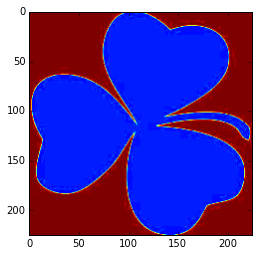

In [189]:
from bokeh.plotting import figure, output_file, show

# create a new plot with a datetime axis type

from scipy.misc import imread

img=imread('../images/green.jpg')

N, M, _ = img.shape
print img.shape

print type(img)
from PIL import Image
img2 = Image.open('../images/green.jpg')
m,n = img2.size

new_img = np.empty((m,n), dtype=np.uint32)
view = new_img.view(dtype=np.uint8).reshape((m, n, 4))
img_data = np.array(img2.getdata(),dtype=np.uint8)

for i in range(m):
    for j in range(n):
        view[i,j,0] = img_data[i+m*j][0]
        view[i,j,1] = img_data[i+m*j][1]
        view[i,j,2] = img_data[i+m*j][2]
        view[i,j,3] = 255
    
print type(new_img)
print new_img.shape

plt.imshow(new_img)
#im=[im for i in range(len(champions.year))]

p = figure(x_range=(0,10), y_range=(0,10))

s1=p.image_rgba(image=[new_img], x=0, y=0, dw=1,dh=1)
show(p)